In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path
import json
import random

# Import API key
from api_keys import owm

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


Bad key text.latex.preview in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the de

In [2]:
# Generate a random integer within the ranges
# lat = x long = y
def rand_lat():
    lat = random.randint(lat_range[0], lat_range[1])
    return lat

def rand_lng():
    lng = random.randint(lng_range[0], lng_range[1])
    return lng

In [3]:
# Define a function to generate a city from the random coordinates, in the format of a list with country code, lat and lng
def rand_city():
    x = rand_lat()
    y = rand_lng()
    city_code = citipy.nearest_city(x, y)
    city = city_code.city_name
    country = city_code.country_code
    output = [city, country, x, y]
    return output

In [4]:
rand_city()

['ushuaia', 'ar', -57, -67]

In [91]:
# Creating an empty dictionary to build the dataframe with
dict = {
    'City': [],
    'Country': [],
    'Latitude': [],
    'Longitude': []
}
# For loop to fill the dictionary with 500 cities
rows = 500
for i in range(rows):
    city_list = rand_city()
    if city_list[0] in dict['City']:
        
        continue
    dict['City'].append(city_list[0])
    dict['Country'].append(city_list[1])
    dict['Latitude'].append(city_list[2])
    dict['Longitude'].append(city_list[3])
# Turning the dictionary into a dataframe
city_df = pd.DataFrame(dict)
city_df.head()

,City,Country,Latitude,Longitude
0,qui nhon,vn,14,109
1,kavaratti,in,11,64
2,isafjordur,is,65,-26
3,happy valley-goose bay,ca,55,-57
4,mejit,mh,12,178


In [95]:
# Creating an empty dictionary to build the dataframe with
dict = {
    'City': [],
    'Country': [],
    'Latitude': [],
    'Longitude': []
}
# While loop to fill the dictionary with 500 cities
rows = 0
while rows < 500:
    city_list = rand_city()
    if city_list[0] in dict['City']:
        continue
    dict['City'].append(city_list[0])
    dict['Country'].append(city_list[1])
    dict['Latitude'].append(city_list[2])
    dict['Longitude'].append(city_list[3])
    rows += 1
# Turning the dictionary into a dataframe
city_df = pd.DataFrame(dict)
city_df.head()

,City,Country,Latitude,Longitude
0,fuerte olimpo,py,-21,-58
1,lamu,ke,-5,45
2,san pedro pochutla,mx,10,-97
3,longyearbyen,sj,90,3
4,port-aux-francais,tf,-84,76


In [96]:
# Store the dataframe as a local csv
city_df.to_csv('output_data/WeatherAPI_Cities.csv', index=False, mode='w')

In [10]:
w_df = pd.read_csv('output_data/WeatherAPI_Cities.csv')
w_df.head()

,City,Country,Latitude,Longitude
0,fuerte olimpo,py,-21,-58
1,lamu,ke,-5,45
2,san pedro pochutla,mx,10,-97
3,longyearbyen,sj,90,3
4,port-aux-francais,tf,-84,76


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [22]:
# Save config information
url = "https://api.openweathermap.org/data/2.5/onecall?"
lat = str(w_df['Latitude'])
lon = str(w_df['Longitude'])
# Build query URL
query_url = url + "lat=" + lat + "&lon=" + lon + "&exclude=hourly,daily,minutely,alerts&" + "appid=" + owm

In [21]:
# Get weather data


The weather API responded with: {'lat': -21, 'lon': -58, 'timezone': 'America/Asuncion', 'timezone_offset': -14400, 'current': {'dt': 1692472966, 'sunrise': 1692439935, 'sunset': 1692481168, 'temp': 303.46, 'feels_like': 303.2, 'pressure': 1007, 'humidity': 40, 'dew_point': 288.36, 'uvi': 2.71, 'clouds': 0, 'visibility': 10000, 'wind_speed': 0.63, 'wind_deg': 130, 'wind_gust': 0.52, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]}}.


In [46]:
# Lists to store API results
temperatures = []
humidities = []
cloudinesses = []
windspeeds = []

# Loop through each row and make API calls
for index, row in w_df.iterrows():
    city = row['City']
    lat = str(row['Latitude'])
    lon = str(row['Longitude'])
    
    query_url = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&units=imperial&exclude=hourly,daily,minutely,alerts&appid={owm}"
    
    # Make API call
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    temp = weather_json['current']['temp']
    hum = weather_json['current']['humidity']
    cloud = weather_json['current']['clouds']
    wind = weather_json['current']['wind_speed']
    
    # Delay after every 50 calls
    if (index + 1) % 50 == 0:
        time.sleep(60)
    
    # Append results to lists
    temperatures.append(temp)
    humidities.append(hum)
    cloudinesses.append(cloud)
    windspeeds.append(wind)
    
    print(f'City # {(index + 1)} : {city}')

# Add results to dataframe
w_df['Temperature'] = temperatures
w_df['Humidity'] = humidities
w_df['Cloudiness'] = cloudinesses
w_df['Windspeed'] = windspeeds

City # 1 : fuerte olimpo
City # 2 : lamu
City # 3 : san pedro pochutla
City # 4 : longyearbyen
City # 5 : port-aux-francais
City # 6 : chibougamau
City # 7 : port douglas
City # 8 : ilulissat
City # 9 : juan griego
City # 10 : adamstown
City # 11 : vorgashor
City # 12 : qaqortoq
City # 13 : malyye derbety
City # 14 : whitehorse
City # 15 : ushuaia
City # 16 : blackmans bay
City # 17 : sinabang
City # 18 : wajir
City # 19 : saint john
City # 20 : flying fish cove
City # 21 : sevastopol
City # 22 : wailua homesteads
City # 23 : thunder bay
City # 24 : stanley
City # 25 : avarua
City # 26 : boguchany
City # 27 : west island
City # 28 : saipan
City # 29 : ola
City # 30 : grytviken
City # 31 : invercargill
City # 32 : halmstad
City # 33 : vingt cinq
City # 34 : al bawiti
City # 35 : leca da palmeira
City # 36 : waitangi
City # 37 : keflavik
City # 38 : biaora
City # 39 : mhamid
City # 40 : daru
City # 41 : tromso
City # 42 : port augusta
City # 43 : zambezi
City # 44 : port mathurin
City # 

In [47]:
w_df.tail()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
495,bel ombre,sc,-4,54,78.48,84,87,16.78
496,gobabis,na,-21,19,64.18,21,16,7.43
497,jaicos,br,-7,-41,79.75,58,63,2.95
498,son la,vn,21,104,65.25,99,100,0.38
499,gonzaga,ph,18,122,72.37,98,84,0.49


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
w_df.to_csv('output_data/WeatherAPI_Cities_Weather.csv', index=False, mode='w')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
w_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,16.400000,18.732000,66.561120,72.350000,55.73400,11.496440
std,36.871874,91.757698,21.414342,21.538136,40.37985,7.818308
min,-85.000000,-177.000000,-61.550000,6.000000,0.00000,0.000000
25%,-9.250000,-58.250000,57.225000,67.000000,10.75000,5.357500
50%,20.500000,19.000000,71.585000,77.000000,62.00000,10.055000
75%,45.000000,98.500000,80.460000,87.000000,99.25000,16.330000
max,90.000000,180.000000,107.650000,100.000000,100.00000,40.710000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

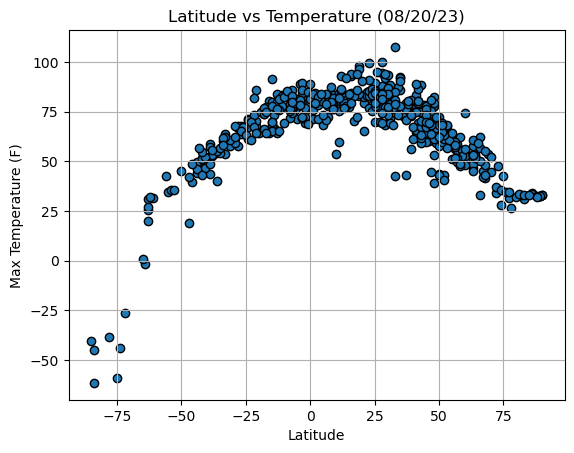

In [74]:
plt.scatter(w_df['Latitude'], w_df['Temperature'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs Temperature (08/20/23)')
plt.grid(True)
plt.savefig('Lat_vs_Temp.png')
plt.show()

Latitudes closer to the equator tend to have higher temperature and vice versa.

## Latitude vs. Humidity Plot

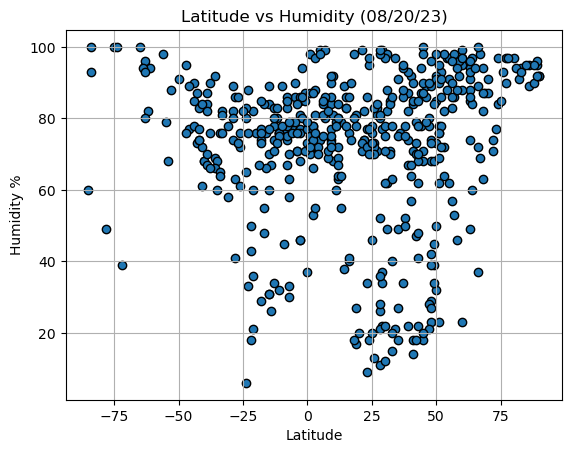

In [55]:
plt.scatter(w_df['Latitude'], w_df['Humidity'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs Humidity (08/20/23)')
plt.grid(True)
plt.savefig('Lat_vs_Humidity.png')
plt.show()

There is a general trend of latitudes further from the equator having higher humidity on average, with a few outliers.

## Latitude vs. Cloudiness Plot

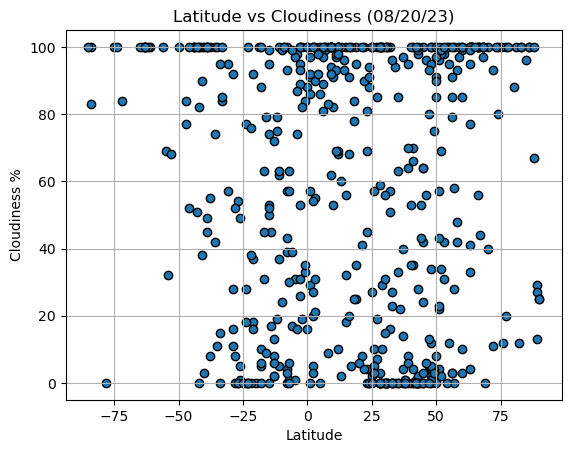

In [56]:
plt.scatter(w_df['Latitude'], w_df['Cloudiness'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs Cloudiness (08/20/23)')
plt.grid(True)
plt.savefig('Lat_vs_Cloudiness.png')
plt.show()

No observable correlation.

## Latitude vs. Wind Speed Plot

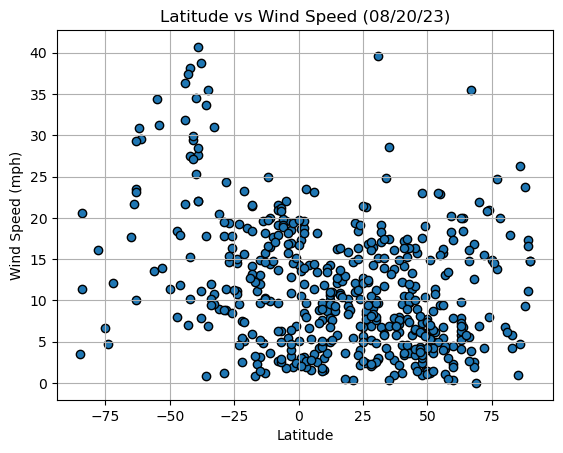

In [57]:
plt.scatter(w_df['Latitude'], w_df['Windspeed'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs Wind Speed (08/20/23)')
plt.grid(True)
plt.savefig('Lat_vs_Windspeed.png')
plt.show()

Cities further from the equator are slightly more likely to have higher wind speed today, especially in the southern hemisphere.

## Linear Regression

In [70]:
# Seperate the dataframe into north and south hemispheres
north_df = w_df[w_df['Latitude'] >= 0]
south_df = w_df[w_df['Latitude'] < 0]
south_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,fuerte olimpo,py,-21,-58,86.05,36,18,5.08
1,lamu,ke,-5,45,77.58,86,31,19.62
4,port-aux-francais,tf,-84,76,-61.55,100,100,11.41
6,port douglas,au,-15,145,69.96,60,53,9.66
9,adamstown,pn,-42,-145,51.66,83,100,27.54


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value: -0.7949986616638899


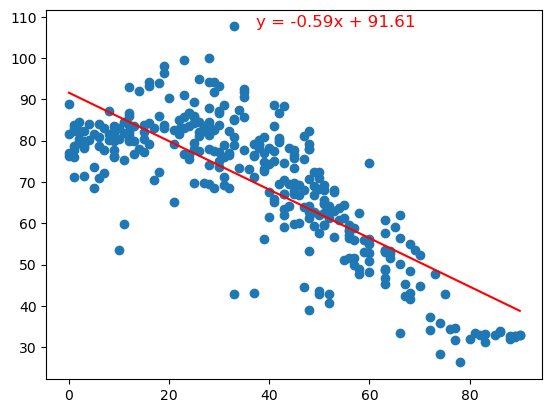

In [75]:
from sklearn.linear_model import LinearRegression

# For each of the above plots calculate and plot a linear regression using the steps below
# Set your x and y and reshape to np array
X = np.array(north_df['Latitude']).reshape(-1, 1)
y = np.array(north_df['Temperature'])
# Fit your Model
model = LinearRegression()
model.fit(X, y)
# Calculate slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
# Generate predictions and store in df
y_pred_min = model.predict(x_min)
y_pred_max = model.predict(x_max)

# Plot the data for each plot
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_pred_min[0], y_pred_max[0]], c='red')

# Displaying the formula
formula = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(X.mean(), y.max(), formula, fontsize=12, color='red')

# Calculate r-value
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print("R-value:", r_value)

plt.savefig('North_Lat_vs_Temp_Regress.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value: 0.8978653591772451


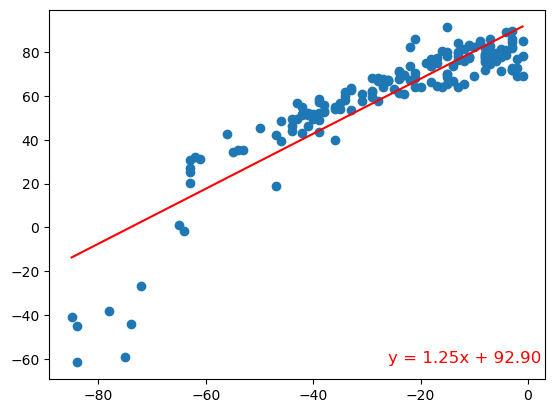

In [79]:
# Set your x and y and reshape to np array
X = np.array(south_df['Latitude']).reshape(-1, 1)
y = np.array(south_df['Temperature'])
# Fit your Model
model = LinearRegression()
model.fit(X, y)
# Calculate slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
# Generate predictions and store in df
y_pred_min = model.predict(x_min)
y_pred_max = model.predict(x_max)

# Plot the data for each plot
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_pred_min[0], y_pred_max[0]], c='red')

# Displaying the formula
formula = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(X.mean(), y.min(), formula, fontsize=12, color='red')

# Calculate r-value
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print("R-value:", r_value)

plt.savefig('South_Lat_vs_Temp_Regress.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value: 0.18050187792696448


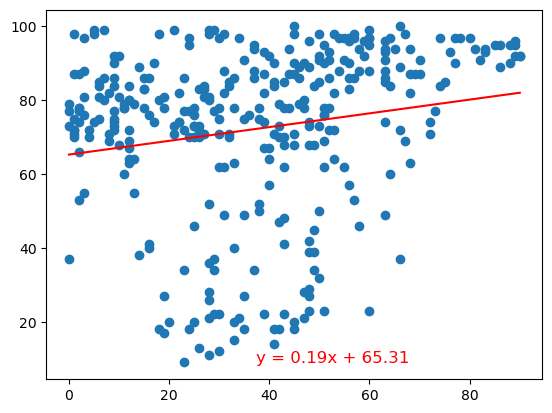

In [81]:
# Set your x and y and reshape to np array
X = np.array(north_df['Latitude']).reshape(-1, 1)
y = np.array(north_df['Humidity'])
# Fit your Model
model = LinearRegression()
model.fit(X, y)
# Calculate slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
# Generate predictions and store in df
y_pred_min = model.predict(x_min)
y_pred_max = model.predict(x_max)

# Plot the data for each plot
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_pred_min[0], y_pred_max[0]], c='red')

# Displaying the formula
formula = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(X.mean(), y.min(), formula, fontsize=12, color='red')

# Calculate r-value
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print("R-value:", r_value)

plt.savefig('North_Lat_vs_Humidity_Regress.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value: -0.23143295206665185


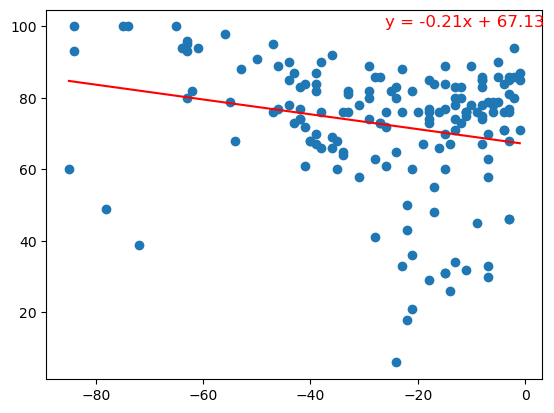

In [78]:
# Set your x and y and reshape to np array
X = np.array(south_df['Latitude']).reshape(-1, 1)
y = np.array(south_df['Humidity'])
# Fit your Model
model = LinearRegression()
model.fit(X, y)
# Calculate slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
# Generate predictions and store in df
y_pred_min = model.predict(x_min)
y_pred_max = model.predict(x_max)

# Plot the data for each plot
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_pred_min[0], y_pred_max[0]], c='red')

# Displaying the formula
formula = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(X.mean(), y.max(), formula, fontsize=12, color='red')

# Calculate r-value
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print("R-value:", r_value)

plt.savefig('South_Lat_vs_Humidity_Regress.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value: -0.010024118323841678


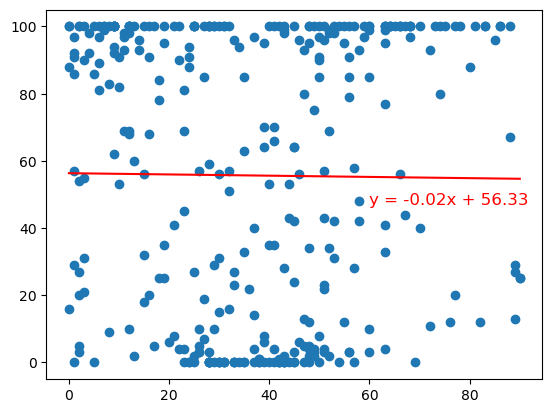

In [87]:
# Set your x and y and reshape to np array
X = np.array(north_df['Latitude']).reshape(-1, 1)
y = np.array(north_df['Cloudiness'])
# Fit your Model
model = LinearRegression()
model.fit(X, y)
# Calculate slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
# Generate predictions and store in df
y_pred_min = model.predict(x_min)
y_pred_max = model.predict(x_max)

# Plot the data for each plot
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_pred_min[0], y_pred_max[0]], c='red')

# Displaying the formula
formula = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(60, 47, formula, fontsize=12, color='red')

# Calculate r-value
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print("R-value:", r_value)

plt.savefig('North_Lat_vs_Cloud_Regress.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value: -0.310386906199452


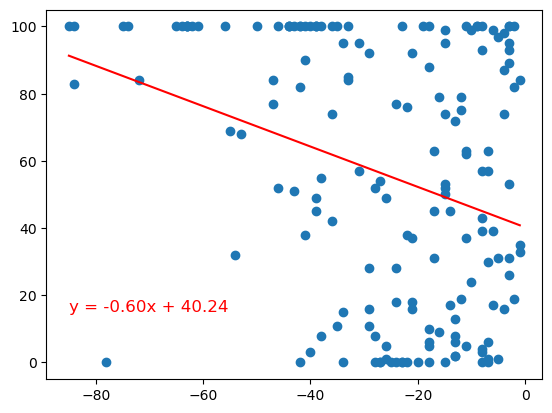

In [89]:
# Set your x and y and reshape to np array
X = np.array(south_df['Latitude']).reshape(-1, 1)
y = np.array(south_df['Cloudiness'])
# Fit your Model
model = LinearRegression()
model.fit(X, y)
# Calculate slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
# Generate predictions and store in df
y_pred_min = model.predict(x_min)
y_pred_max = model.predict(x_max)

# Plot the data for each plot
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_pred_min[0], y_pred_max[0]], c='red')

# Displaying the formula
formula = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(X.min(), 15, formula, fontsize=12, color='red')

# Calculate r-value
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print("R-value:", r_value)

plt.savefig('South_Lat_vs_Cloud_Regress.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value: 0.04255572723808711


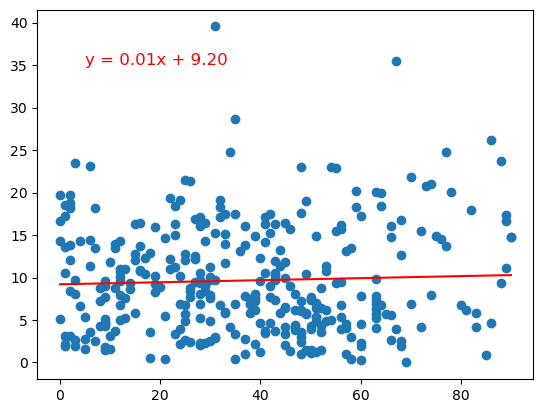

In [92]:
# Set your x and y and reshape to np array
X = np.array(north_df['Latitude']).reshape(-1, 1)
y = np.array(north_df['Windspeed'])
# Fit your Model
model = LinearRegression()
model.fit(X, y)
# Calculate slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
# Generate predictions and store in df
y_pred_min = model.predict(x_min)
y_pred_max = model.predict(x_max)

# Plot the data for each plot
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_pred_min[0], y_pred_max[0]], c='red')

# Displaying the formula
formula = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(5, 35, formula, fontsize=12, color='red')

# Calculate r-value
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print("R-value:", r_value)

plt.savefig('North_Lat_vs_Wind_Regress.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value: -0.29776686209610276


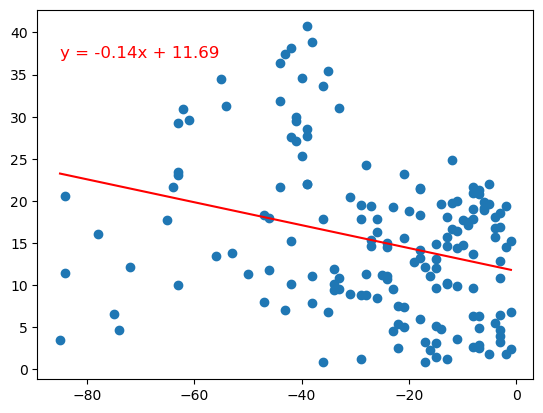

In [96]:
# Set your x and y and reshape to np array
X = np.array(south_df['Latitude']).reshape(-1, 1)
y = np.array(south_df['Windspeed'])
# Fit your Model
model = LinearRegression()
model.fit(X, y)
# Calculate slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
# Generate predictions and store in df
y_pred_min = model.predict(x_min)
y_pred_max = model.predict(x_max)

# Plot the data for each plot
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_pred_min[0], y_pred_max[0]], c='red')

# Displaying the formula
formula = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(X.min(), 37, formula, fontsize=12, color='red')

# Calculate r-value
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print("R-value:", r_value)

plt.savefig('South_Lat_vs_Wind_Regress.png')